# Predicting Stock Prices using clustering 

In this project, we'll work with data from the S&P500 Index. The S&P500 is a stock market index. Before we get into what an index is, we'll need to start with the basics of the stock market.

Some companies are publicly traded, which means that anyone can buy and sell their shares on the open market. A share entitles the owner to some control over the direction of the company and to a percentage (or share) of the earnings of the company. When you buy or sell shares, it's common known as trading a stock.

The price of a share is based on supply and demand for a given stock. For example, Apple stock has a price of 120 dollars per share as of December 2015 -- http://www.nasdaq.com/symbol/aapl. A stock that is in less demand, like Ford Motor Company, has a lower price -- http://finance.yahoo.com/q?s=F. Stock price is also influenced by other factors, including the number of shares a company has issued.

Stocks are traded daily and the price can rise or fall from the beginning of a trading day to the end based on demand. Stocks that are in more in demand, such as Apple, are traded more often than stocks of smaller companies.

Indexes aggregate the prices of multiple stocks together, and allow you to see how the market as a whole performs. For example, the Dow Jones Industrial Average aggregates the stock prices of 30 large American companies together. The S&P500 Index aggregates the stock prices of 500 large companies. When an index fund goes up or down, you can say that the primary market or sector it represents is doing the same. For example, if the Dow Jones Industrial Average price goes down one day, you can say that American stocks overall went down (ie, most American stocks went down in price).

You'll be using historical data on the price of the S&P500 Index to make predictions about future prices. Predicting whether an index goes up or down helps forecast how the stock market as a whole performs. Since stocks tend to correlate with how well the economy as a whole is performs, it can also help with economic forecasts.

There are thousands of traders who make money by buying and selling Exchange Traded Funds. ETFs allow you to buy and sell indexes like stocks. This means that you could "buy" the S&P500 Index ETF when the price is low and sell when it's high to make a profit. Creating a predictive model could allow traders to make money on the stock market.

Note: You shouldn't make trades with any models developed in this lesson. Trading stocks has risks and nothing in this lesson constitutes stock trading advice.

In this lesson, you'll be working with a csv file containing index prices. Each row in the file contains a daily record of the price of the S&P500 Index from 1950 to 2015. The dataset is stored in sphist.csv.

The columns of the dataset are:


- Date -- The date of the record.
- Open -- The opening price of the day (when trading starts).
- High -- The highest trade price during the day.
- Low -- The lowest trade price during the day.
- Close -- The closing price for the day (when trading is finished).
- Volume -- The number of shares traded.
- Adj Close -- The daily closing price, adjusted retroactively to include any corporate actions. Read more here.

We'll be using this dataset to develop a predictive model. We'll train the model with data from 1950-2012 and try to make predictions from 2013-2015.

To enable this project, we shall first of all:
- set up our environment, loading the pythin libraries we will need for this work
- load our dataset - 'sphist.csv'
- take an initial look at the dataset to see what data types we have and if there is any missing data.


In [1]:
# Importing the standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# importing the modelling and statistical libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
# load our dataset into Pandas
shares = pd.read_csv('sphist.csv')
# View the dataset
shares

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
...,...,...,...,...,...,...,...
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000


In [3]:
shares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 7 columns):
Date         16590 non-null object
Open         16590 non-null float64
High         16590 non-null float64
Low          16590 non-null float64
Close        16590 non-null float64
Volume       16590 non-null float64
Adj Close    16590 non-null float64
dtypes: float64(6), object(1)
memory usage: 907.4+ KB


In [4]:
shares.describe()

,Open,High,Low,Close,Volume,Adj Close
count,16590.000000,16590.000000,16590.000000,16590.000000,1.659000e+04,16590.000000
mean,482.570941,485.624237,479.367501,482.692491,7.940099e+08,482.692491
std,554.889186,558.186049,551.367625,555.007904,1.456582e+09,555.007904
min,16.660000,16.660000,16.660000,16.660000,6.800000e+05,16.660000
25%,83.860001,84.594997,83.139997,83.860001,7.610000e+06,83.860001
50%,144.049995,145.294998,143.105004,144.264999,7.170500e+07,144.264999
75%,950.722488,956.665024,941.969986,950.797500,7.866750e+08,950.797500
max,2130.360107,2134.719971,2126.060059,2130.820068,1.145623e+10,2130.820068


(array([9095., 1747.,  813.,  421.,  817., 1579., 1278.,  296.,  173.,
         371.]), array([  16.66     ,  228.0300107,  439.4000214,  650.7700321,
         862.1400428, 1073.5100535, 1284.8800642, 1496.2500749,
        1707.6200856, 1918.9900963, 2130.360107 ]), <a list of 10 Patch objects>)

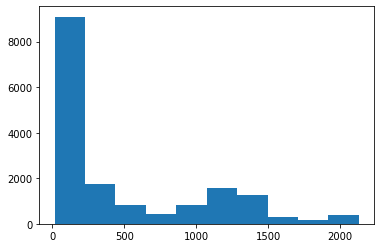

In [5]:
plt.hist(shares['Open'])

### Exploring the data
We can see from this analysis that:
- the date column is currently in as a string object - this will need to be changed to a pandas date format
- there aren no null values within the dataset
- there are no zero values in any of the rows
- the spread of values of prices, within the dataset, is appropriate to our expectations for such things
- the dataset is currently ordered by date, but in descending order - we will change this to ascending order

The image below shows the actual historical values for the S&P 500 Index over the last 10 years, which demonstrates that the maximum value in our dataset, approximately $2100, was appropriate to December 2015.

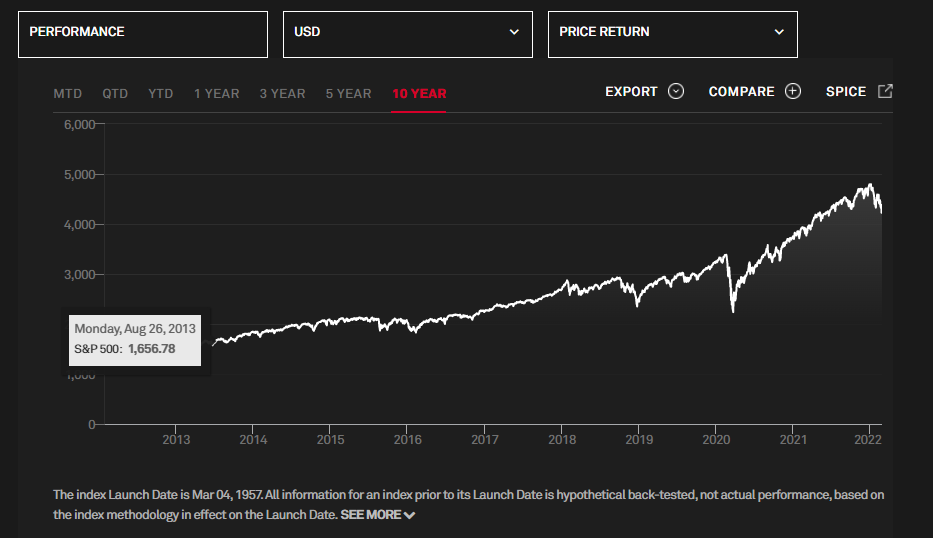

So let's convert that 'date' column into the correct format and, whilst we are about it, in order to avoid some mis-typing as we go through the project, I shall lower-case all of the column names and also replace the space in 'adj close' with an underscore ie 'adj_close'

In [6]:
# convert Date to date format
shares['Date'] = pd.to_datetime(shares['Date'])
# make all column names lower case
shares.columns = shares.columns.str.lower()
# remove the space from 'adj close'
shares = shares.rename(columns={"adj close": "adj_close"})
# change descending dates into ascending
shares = shares.sort_values('date', ascending = True)
shares

,date,open,high,low,close,volume,adj_close
16589,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000
...,...,...,...,...,...,...,...
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941


## Notes about inter-relationship between rows
Datasets taken from the stock market need to be handled differently than datasets from other sectors when it's time to make predictions. In a normal machine learning exercise, we treat each row as independent. Stock market data is sequential and each observation comes a day after the previous observation. Thus, the observations are not all independent and you can't treat them as such.

This means you have to be extra careful not to inject "future" knowledge into past rows when you train and predict. Injecting future knowledge makes our model look good when we train and test it, but it fails in the real world. This is how many algorithmic traders lose money.

The time series nature of the data means that we can generate indicators to make our model more accurate. For instance, you can create a new column that contains the average price of the last 10 trades for each row. This incorporates information from multiple prior rows into one and makes predictions much more accurate.

When you do this, you have to be careful not to use the current row in the values you average. You want to teach the model how to predict the current price from historical prices. If you include the current price in the prices you average, it will be equivalent to handing the answers to the model upfront, and will make it impossible to use in the "real world", where you don't know the price upfront.

Here are some indicators that are interesting to generate for each row:

- The average price from the past 5 days.
- The average price for the past 30 days.
- The average price for the past 365 days.
- The ratio between the average price for the past 5 days, and the average price for the past 365 days.
- The standard deviation of the price over the past 5 days.
- The standard deviation of the price over the past 365 days.
- The ratio between the standard deviation for the past 5 days, and the standard deviation for the past 365 days.

"Days" means "trading days" -- so if you're computing the average of the past 5 days, it should be the 5 most recent dates before the current one. Assume that "price" means the 'close' column. Always be careful not to include the current price in these indicators! You're predicting the next day price, so our indicators are designed to predict the current price from the previous prices.

Some of these indicators require a year of historical data to compute. Our first day of data falls on 1950-01-03, so the first day you can start computing indicators on is 1951-01-03.

To compute indicators, you'll need to loop through each day from 1951-01-03 to 2015-12-07 (the last day you have prices for). For instance, if we were computing the average price from the past 5 days, we'd start at 1951-01-03, get the prices for each day from 1950-12-26 to 1951-01-02, and find the average. The reason why we start on the 26th and take more than 5 calendar days into account is because the stock market is shutdown on certain holidays. Since we're looking at the past 5 trading days, we need to look at more than 5 calendar days to find them.

In [7]:
# engineering new columns
shares['5_day_average'] = shares['close'].rolling(5).mean().shift(1)
shares['30_day_average'] = shares['close'].rolling(30).mean().shift(1)
shares['365_day_average'] = shares['close'].rolling(365).mean().shift(1)
shares['5_to_365_ratio'] = shares['5_day_average']/shares['365_day_average']
shares['std_5_days'] = shares['close'].rolling(5).std().shift(1)
shares['std_365_days'] = shares['close'].rolling(365).std().shift(1)
shares['std_5_to_365_ratio'] = shares['std_5_days']/shares['std_365_days']

In [8]:
shares.head(10)

,date,open,high,low,close,volume,adj_close,5_day_average,30_day_average,365_day_average,5_to_365_ratio,std_5_days,std_365_days,std_5_to_365_ratio
16589,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16584,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,16.900,NaN,NaN,NaN,0.157956,NaN,NaN
16583,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,16.974,NaN,NaN,NaN,0.089051,NaN,NaN
16582,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,17.022,NaN,NaN,NaN,0.067602,NaN,NaN
16581,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,16.988,NaN,NaN,NaN,0.134796,NaN,NaN
16580,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999,16.926,NaN,NaN,NaN,0.196545,NaN,NaN


In [9]:
shares.tail(10)

,date,open,high,low,close,volume,adj_close,5_day_average,30_day_average,365_day_average,5_to_365_ratio,std_5_days,std_365_days,std_5_to_365_ratio
9,2015-11-23,2089.409912,2095.610107,2081.389893,2086.590088,3.587980e+09,2086.590088,2071.523974,2061.892989,2033.605890,1.018646,18.246940,64.911334,0.281106
8,2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,3.884930e+09,2089.139893,2078.204004,2064.197327,2034.018028,1.021723,15.807754,64.768328,0.244066
7,2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2.852940e+09,2088.870117,2085.943994,2067.045658,2034.432712,1.025320,3.491188,64.634873,0.054014
6,2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,1.466840e+09,2090.110107,2087.002002,2070.199996,2034.835123,1.025637,3.395982,64.514871,0.052639
5,2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,4.245030e+09,2080.409912,2088.776025,2072.408333,2035.199864,1.026325,1.309055,64.449800,0.020311
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178,1.025297,3.916109,64.370261,0.060837
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082,1.026680,7.956808,64.352527,0.123644
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356,1.025573,9.333599,64.277554,0.145208
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343,1.021580,19.599946,64.121622,0.305668
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,2080.771973,2080.237329,2036.869425,1.021554,19.806136,64.058862,0.309187


In [10]:
shares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16590 entries, 16589 to 0
Data columns (total 14 columns):
date                  16590 non-null datetime64[ns]
open                  16590 non-null float64
high                  16590 non-null float64
low                   16590 non-null float64
close                 16590 non-null float64
volume                16590 non-null float64
adj_close             16590 non-null float64
5_day_average         16585 non-null float64
30_day_average        16560 non-null float64
365_day_average       16225 non-null float64
5_to_365_ratio        16225 non-null float64
std_5_days            16585 non-null float64
std_365_days          16225 non-null float64
std_5_to_365_ratio    16225 non-null float64
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.9 MB


### Dropping columns with NaN's
Our new columns have introduced rows with NaN values: the first 365 entries prior to the 365 day mean values.  We need to drop these rows prior to starting any analysis. 

In [11]:
shares = shares.dropna()

In [12]:
shares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 16224 to 0
Data columns (total 14 columns):
date                  16225 non-null datetime64[ns]
open                  16225 non-null float64
high                  16225 non-null float64
low                   16225 non-null float64
close                 16225 non-null float64
volume                16225 non-null float64
adj_close             16225 non-null float64
5_day_average         16225 non-null float64
30_day_average        16225 non-null float64
365_day_average       16225 non-null float64
5_to_365_ratio        16225 non-null float64
std_5_days            16225 non-null float64
std_365_days          16225 non-null float64
std_5_to_365_ratio    16225 non-null float64
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.9 MB


## Creating our train and test datasets

We will now split the shares dataset into our train and test sets, with the split being thise with a date less than 2013-01-01, going to train, and thise after this date going to test.


In [13]:
train = shares[shares['date'] < '2013-01-01']
test = shares[shares['date'] >= '2013-01-01']

In [14]:
train.tail()

,date,open,high,low,close,volume,adj_close,5_day_average,30_day_average,365_day_average,5_to_365_ratio,std_5_days,std_365_days,std_5_to_365_ratio
743,2012-12-24,1430.150024,1430.150024,1424.660034,1426.660034,1.248960e+09,1426.660034,1437.360010,1405.926001,1326.114028,1.083889,7.622009,89.830647,0.084849
742,2012-12-26,1426.660034,1429.420044,1416.430054,1419.829956,2.285030e+09,1419.829956,1436.620019,1407.486336,1326.412494,1.083087,8.589693,89.983530,0.095458
741,2012-12-27,1419.829956,1422.800049,1401.800049,1418.099976,2.830180e+09,1418.099976,1431.228003,1408.813000,1326.716494,1.078775,9.058684,90.111444,0.100528
740,2012-12-28,1418.099976,1418.099976,1401.579956,1402.430054,2.426680e+09,1402.430054,1427.685986,1410.265332,1326.995836,1.075878,10.208568,90.236516,0.113131
739,2012-12-31,1402.430054,1426.739990,1398.109985,1426.189941,3.204330e+09,1426.189941,1419.434009,1411.830001,1327.261562,1.069446,10.701861,90.315637,0.118494


In [15]:
test.head()

,date,open,high,low,close,volume,adj_close,5_day_average,30_day_average,365_day_average,5_to_365_ratio,std_5_days,std_365_days,std_5_to_365_ratio
738,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4.202600e+09,1462.420044,1418.641992,1414.258667,1327.534055,1.068629,9.820801,90.463948,0.108560
737,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3.829730e+09,1459.369995,1425.793994,1417.676668,1327.908247,1.073714,22.261321,90.738976,0.245334
736,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3.424290e+09,1466.469971,1433.702002,1420.092668,1328.224877,1.079412,26.274326,90.995857,0.288742
735,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,3.304970e+09,1461.890015,1443.376001,1422.714665,1328.557617,1.086423,27.945242,91.279049,0.306152
734,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,3.601600e+09,1457.150024,1455.267993,1425.076664,1328.898603,1.095093,16.453319,91.544368,0.179731


## Setting our error metric and running the model on the training set
It's recommended to use Mean Absolute Error, also called MAE, as an error metric, because it will show you how "close" you were to the price in intuitive terms. Mean Squared Error, or MSE, is an alternative that is more commonly used, but makes it harder to intuitively tell how far off you are from the true price because it squares the error.

We will now:
- Initialize an instance of the LinearRegression class.
- Train a linear regression model, using the train dataframe. Leave out all of the original columns (Close, High, Low, Open, Volume, Adj Close, Date) when training your model. These all contain knowledge of the future that you don't want to feed the model.
- Use the 'close' column as the target.
- Make predictions for the 'close' column of the test data, using the same columns for training as you did with train.
- Compute the error between the predictions and the 'close' column of test.

In [16]:
# Set the training set features and target
train_features = train[['5_day_average', '30_day_average', '365_day_average', '5_to_365_ratio', 'std_5_days', 'std_365_days', 'std_5_to_365_ratio']]
train_target = train['close']

# use the linear regression model on the train set
lrm = LinearRegression()
lrm.fit(train_features, train_target)

# make predictions using the current model
train['predicted'] = lrm.predict(train_features)
train['true'] = train_target

# finding the row error
train['error'] = train['predicted']-train['true']
train['abs_error'] = abs(train['error'])
print(train[['predicted', 'true', 'error', 'abs_error']])

model_score = lrm.score(train_features, train_target)
print('This model achieved a score of:', model_score)

# calculating the mean_absolute_error for the train set
train_mae = train['abs_error'].mean()
print('The Mean Absolute Error (mae) for the train set is:', train_mae)

         predicted         true      error  abs_error
16224    21.932186    22.020000  -0.087814   0.087814
16223    22.019716    21.910000   0.109716   0.109716
16222    22.045881    21.780001   0.265880   0.265880
16221    22.045178    21.549999   0.495179   0.495179
16220    21.983492    21.290001   0.693491   0.693491
...            ...          ...        ...        ...
743    1440.067817  1426.660034  13.407783  13.407783
742    1439.082042  1419.829956  19.252086  19.252086
741    1433.200542  1418.099976  15.100566  15.100566
740    1429.214866  1402.430054  26.784812  26.784812
739    1420.264999  1426.189941  -5.924942   5.924942

[15486 rows x 4 columns]
This model achieved a score of: 0.9995223668123336
The Mean Absolute Error (mae) for the train set is: 4.979250385436798


C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

## Getting predictions on our test set using the training model

In [17]:
# Set the test set features and target
test_features = test[['5_day_average', '30_day_average', '365_day_average', '5_to_365_ratio', 'std_5_days', 'std_365_days', 'std_5_to_365_ratio']]
test_target = test['close']

# make predictions on the test set
test['predicted'] = lrm.predict(test_features)
test['true'] = test_target

# finding the row error
test['error'] = test['predicted']-test['true']
test['abs_error'] = abs(test['error'])
print(test[['predicted', 'true', 'error', 'abs_error']])

model_score = lrm.score(test_features, test_target)
print('This model achieved a score of:', model_score)

# calculating the mean_absolute_error for the train set
test_mae = np.mean(test['abs_error'])
print('The Mean Absolute Error (mae) for the test set is:', test_mae)

       predicted         true      error  abs_error
738  1419.354407  1462.420044 -43.065637  43.065637
737  1425.505780  1459.369995 -33.864215  33.864215
736  1433.379736  1466.469971 -33.090235  33.090235
735  1443.360695  1461.890015 -18.529320  18.529320
734  1457.055697  1457.150024  -0.094327   0.094327
..           ...          ...        ...        ...
4    2088.183892  2102.629883 -14.445991  14.445991
3    2091.064138  2079.510010  11.554128  11.554128
2    2088.769765  2049.620117  39.149648  39.149648
1    2079.334270  2091.689941 -12.355671  12.355671
0    2079.565282  2077.070068   2.495214   2.495214

[739 rows x 4 columns]
This model achieved a score of: 0.9866645875243005
The Mean Absolute Error (mae) for the test set is: 16.14514060974367


C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

## Comparing the errors of train and test sets

The Mean Absolute Error (mae) for the train set is: 4.979250385436798

The Mean Absolute Error (mae) for the test set is: 16.14514060974367

With an error metric that is more than 10 times greater for the test set than the training set, this would suggest that this model's variation is significant - likely due to overfitting of the training set.

C:\Users\annsc\Anaconda3\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\annsc\Anaconda3\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


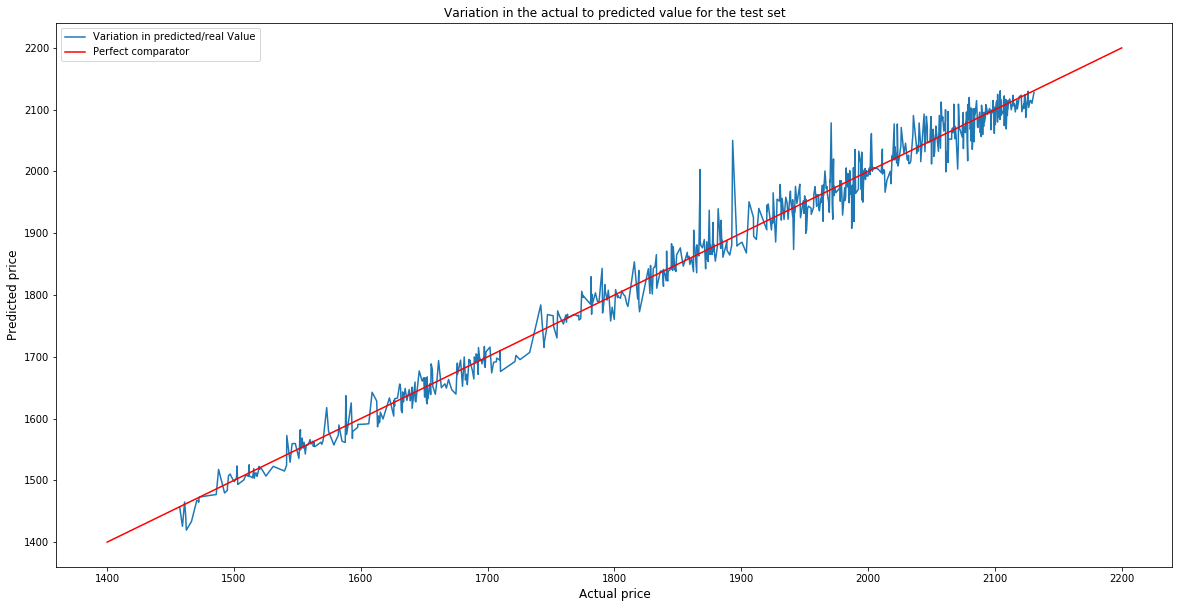

In [18]:
# plotting the variation in stock value by value
x = test['true']
y = test['predicted']
x2 = [1400,2200]
y2 = [1400, 2200]
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
ax = sns.lineplot(y=y, x=x, label="Variation in predicted/real Value")
ax2 = sns.lineplot(y=y2, x=x2, c='red', label='Perfect comparator')
    
ax.set_ylabel("Predicted price", size = 'large') 
ax.set_xlabel("Actual price", size='large')
ax.set_title('Variation in the actual to predicted value for the test set', size='large')

plt.show()  

C:\Users\annsc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


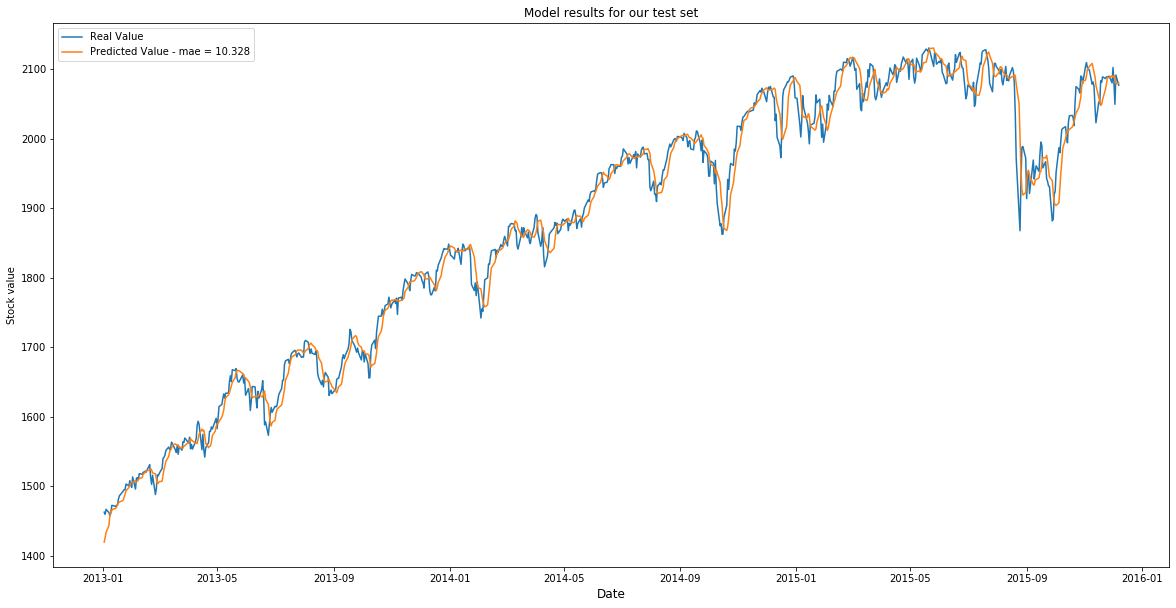

In [19]:
# plotting the test results
x = test['date']
y = test['true']
y2 = test['predicted']
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
ax = sns.lineplot(y=y, x=x, label="Real Value")
ax2 = sns.lineplot(x=x, y=y2, label ='Predicted Value - mae = 10.328')
ax.set_title('Model results for our test set', size='large')
ax.set_ylabel("Stock value") 
ax.set_xlabel("Date", fontsize = "large")
plt.show()  

### Frequenecy of over or under valuation

The main reason for undertaking stock valuation predictions is to make money based on an assumption about whether the value of the stocks will increase or decrease on a given day.

Let's take a look at how frequently the predicted valuation was either above or below the actual value.

In [20]:
total = len(test)
count_over_predicted = len(test[test['error']>=0])
over_percentage = int((count_over_predicted/total)*100)
count_under_predicted = len(test[test['error']<=0])
under_percentage = int((count_under_predicted/total)*100)

print(f'Our model over predicted the value of stocks on {count_over_predicted} out of {total} days of trading - {over_percentage}% of occassions')
print(f'Our model over predicted the value of stocks on {count_under_predicted} out of {total} days of trading - {under_percentage}% of occassions')

Our model over predicted the value of stocks on 317 out of 739 days of trading - 42% of occassions
Our model over predicted the value of stocks on 422 out of 739 days of trading - 57% of occassions


In [21]:
#### Calculate the metrics RMSE, MAE and MAPE for the model####
def calculate_model_scores(y_true, y_pred):
    
    # Calculate the Root Mean Squared Error (RMSE)  
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))
    
    # Calculate the Mean Absolute Error
    mae = np.mean(abs(y_true-y_pred))
       
    # calculate mae and mape statistics
    mape = np.mean(np.abs((y_true-y_pred) / y_true))*100 
    
    return rmse, mae, mape

## Interpreting current results


In [24]:
test_rmse, test_mae, test_mape = calculate_model_scores(test['true'], test['predicted'])
mean_value = np.mean(test['close'])
print('The mean S&P500 stock value across the whole of the test set is ($):', mean_value, '\n'
    'The Root Mean Squared Error (RMSE) for our current test model is ($):', test_rmse, '\n'
     'The Mean Absolute Error (MAE) for our current test model is ($):', test_mae, '\n'
      'The Mean Absolute Percentage Error (MAPE) for our current test model is (%):', test_mape)

The mean S&P500 stock value across the whole of the test set is ($): 1874.8903383897166 
The Root Mean Squared Error (RMSE) for our current test model is ($): 22.201870066393997 
The Mean Absolute Error (MAE) for our current test model is ($): 16.14514060974367 
The Mean Absolute Percentage Error (MAPE) for our current test model is (%): 0.8615617558909568


It is notable that the RMSE and the MAPE are almost identical.  This is likely to be beacuse the error values themselves are of a low magnitude.  If the error variation was greater, the RMSE would exagerate such differences and would be seen as a greater difference between these two score metrics.

## Add more features

- The average volume over the past five days.
- The average volume over the past year.
- The ratio between the average volume for the past five days, and the average volume for the past year.
- The standard deviation of the average volume over the past five days.
- The standard deviation of the average volume over the past year.
- The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year.
- The year component of the date.
- The ratio between the lowest price in the past year and the current price.
- The ratio between the highest price in the past year and the current price.


In [25]:
model_score = lrm.score(train_features, train_target)
model_score

0.9995223668123336

# Vary which features are sleected and tested

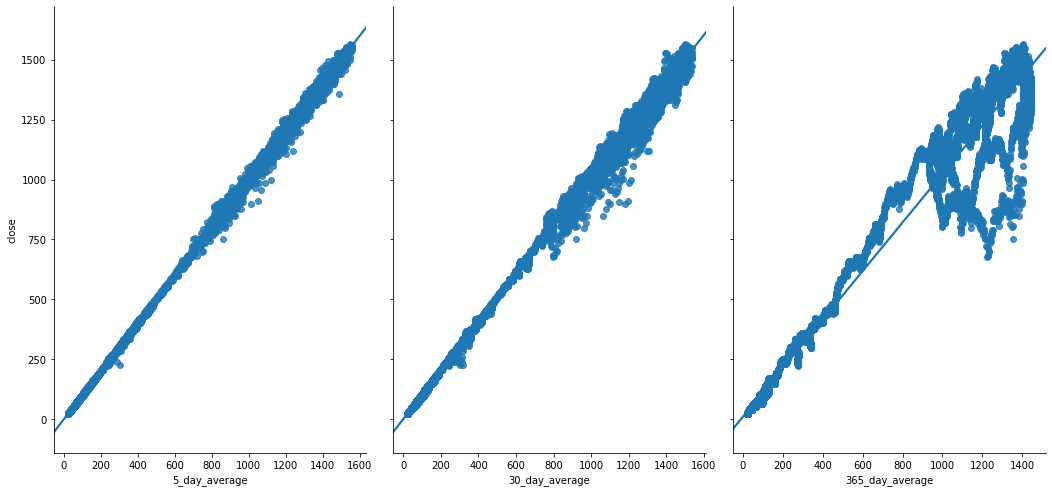

In [26]:
sns.pairplot(train, x_vars=['5_day_average', '30_day_average', '365_day_average'], y_vars='close', height=7, aspect=0.7, kind='reg')

# Change the model

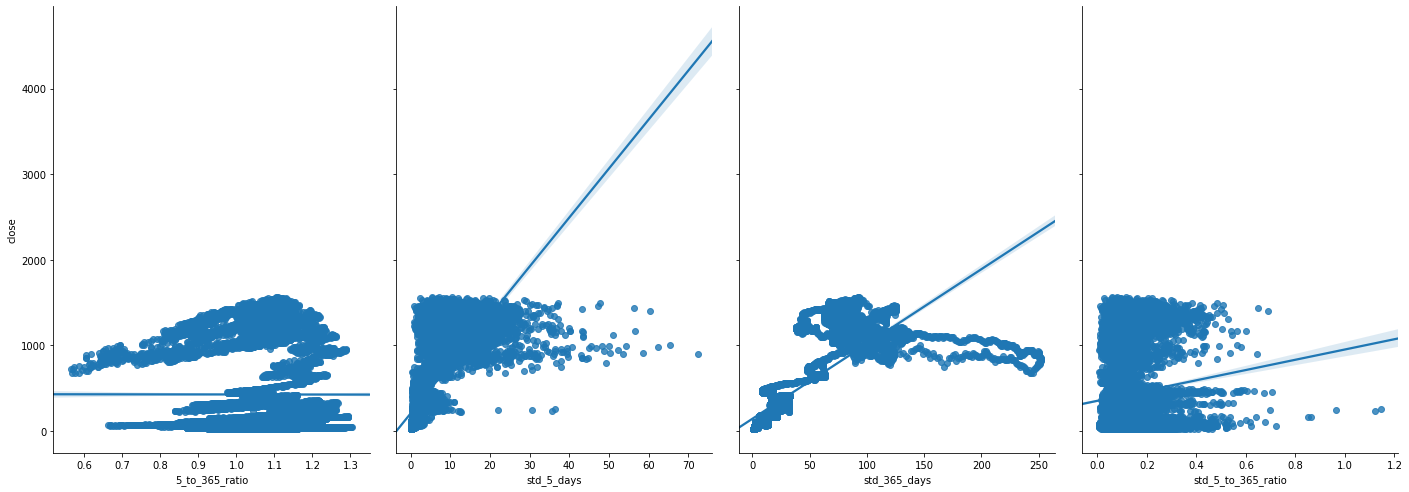

In [27]:

sns.pairplot(train, x_vars=['5_to_365_ratio', 'std_5_days', 'std_365_days', 'std_5_to_365_ratio'], y_vars='close', height=7, aspect=0.7, kind='reg')

In [28]:
train_features = train[['5_day_average', '30_day_average', '365_day_average', '5_to_365_ratio', 'std_5_days', 'std_365_days', 'std_5_to_365_ratio']]
train_target = train['close']
train.corr()['close'].abs().sort_values(ascending = False)

true                  1.000000
close                 1.000000
adj_close             1.000000
low                   0.999946
high                  0.999944
open                  0.999878
predicted             0.999761
5_day_average         0.999757
30_day_average        0.999012
365_day_average       0.986180
std_365_days          0.801154
std_5_days            0.741834
volume                0.730895
abs_error             0.631133
std_5_to_365_ratio    0.107837
error                 0.021855
5_to_365_ratio        0.001065
Name: close, dtype: float64

In [29]:
# Set the training set features and target
train_features = train.loc[:,['5_day_average', '30_day_average', '365_day_average', 'std_365_days']]
train_target = train.loc[:,['close']]

# use the linear regression model on the train set
lrm = LinearRegression()
lrm.fit(train_features, train_target)

# make predictions using the current model
train['predicted'] = lrm.predict(train_features)
train['true'] = train_target

# finding the row error
train['error'] = train['predicted']-train['true']
train['abs_error'] = abs(train['error'])
print(train[['predicted', 'true', 'error', 'abs_error']])

# calculating the mean_absolute_error for the train set
train_mae = train['abs_error'].mean()
print('The Mean Absolute Error (mae) for the train set is:', train_mae)
model_score = lrm.score(train_features, train_target)
model_score

         predicted         true      error  abs_error
16224    21.985337    22.020000  -0.034663   0.034663
16223    22.094419    21.910000   0.184419   0.184419
16222    22.173596    21.780001   0.393595   0.393595
16221    22.162763    21.549999   0.612764   0.612764
16220    22.059613    21.290001   0.769612   0.769612
...            ...          ...        ...        ...
743    1439.852913  1426.660034  13.192879  13.192879
742    1438.941480  1419.829956  19.111524  19.111524
741    1433.040371  1418.099976  14.940395  14.940395
740    1429.121012  1402.430054  26.690958  26.690958
739    1420.123698  1426.189941  -6.066243   6.066243

[15486 rows x 4 columns]
The Mean Absolute Error (mae) for the train set is: 4.977600909075977


C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

0.9995218578230876

In [30]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
# define the dataset
# Set the training set features and target
X = train[['5_day_average', '30_day_average', '365_day_average', 'std_365_days']]
y = train['close']

# fit our data to the SelectKBest filter using the f_regression as the scoring technique

KBest_f_regression = SelectKBest(f_regression, k=3).fit(X, y)

#Get features with get_support()
# get_feature_names_out([feature_names_in_])
Best_f = KBest_f_regression.get_support(1) # the most important features using f_regression
X_new_f = X[X.columns[Best_f]] # final features from f_regression
print('Features selected using f_regression:','\n\n', sorted(X_new_f))


Features selected using f_regression: 

 ['30_day_average', '365_day_average', '5_day_average']


### Running the model on just the 3 best correlated features

In [31]:
# Set the training set features and target
train_features = train[['5_day_average', '30_day_average', '365_day_average']]
train_target = train['close']

# use the linear regression model on the train set
lrm = LinearRegression()
lrm.fit(train_features, train_target)

# make predictions using the current model
train['predicted'] = lrm.predict(train_features)
train['true'] = train_target

# finding the row error
train['error'] = train['predicted']-train['true']
train['abs_error'] = abs(train['error'])
print(train[['predicted', 'true', 'error', 'abs_error']])

# calculating the mean_absolute_error for the train set
train_mae = train['abs_error'].mean()
print('The Mean Absolute Error (mae) for the train set is:', train_mae)
model_score = lrm.score(train_features, train_target)
model_score

         predicted         true      error  abs_error
16224    21.990162    22.020000  -0.029838   0.029838
16223    22.099567    21.910000   0.189567   0.189567
16222    22.179012    21.780001   0.399011   0.399011
16221    22.168291    21.549999   0.618292   0.618292
16220    22.065090    21.290001   0.775089   0.775089
...            ...          ...        ...        ...
743    1440.026657  1426.660034  13.366623  13.366623
742    1439.107248  1419.829956  19.277292  19.277292
741    1433.189464  1418.099976  15.089488  15.089488
740    1429.256885  1402.430054  26.826831  26.826831
739    1420.236586  1426.189941  -5.953355   5.953355

[15486 rows x 4 columns]
The Mean Absolute Error (mae) for the train set is: 4.980534340688721


C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

0.9995215140197241

## Adding further features

- The average volume over the past five days.
- The average volume over the past year.
- The ratio between the average volume for the past five days, and the average volume for the past year.
- The standard deviation of the average volume over the past five days.
- The standard deviation of the average volume over the past year.
- The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year.
- The ratio between the lowest price in the past year and the current price.
- The ratio between the highest price in the past year and the current price.

In [32]:
shares['5_day_average_vol'] = shares['volume'].rolling(5).mean().shift(1)
shares['365_day_average_vol'] = shares['volume'].rolling(365).mean().shift(1)
shares['5_to_365_vol_ratio'] = shares['5_day_average_vol']/shares['365_day_average_vol']
shares['std_5_days_vol'] = shares['volume'].rolling(5).std().shift(1)
shares['std_365_days_vol'] = shares['volume'].rolling(365).std().shift(1)
shares['std_5_to_365__vol_ratio'] = shares['std_5_days_vol']/shares['std_365_days_vol']
shares['lowest365_current_ratio'] = (shares['close'].rolling(365).min())/shares['close'].shift(1)
shares['highest365_current_ratio'] = (shares['close'].rolling(365).max())/shares['close'].shift(1)


C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [33]:
shares

,date,open,high,low,close,volume,adj_close,5_day_average,30_day_average,365_day_average,...,std_365_days,std_5_to_365_ratio,5_day_average_vol,365_day_average_vol,5_to_365_vol_ratio,std_5_days_vol,std_365_days_vol,std_5_to_365__vol_ratio,lowest365_current_ratio,highest365_current_ratio
16224,1951-06-19,22.020000,22.020000,22.020000,22.020000,1.100000e+06,22.020000,21.800000,21.703333,19.447726,...,1.790253,0.143121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16223,1951-06-20,21.910000,21.910000,21.910000,21.910000,1.120000e+06,21.910000,21.900000,21.683000,19.462411,...,1.789307,0.119409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16222,1951-06-21,21.780001,21.780001,21.780001,21.780001,1.100000e+06,21.780001,21.972000,21.659667,19.476274,...,1.788613,0.051758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16221,1951-06-22,21.549999,21.549999,21.549999,21.549999,1.340000e+06,21.549999,21.960000,21.631000,19.489562,...,1.787659,0.064390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16220,1951-06-25,21.290001,21.290001,21.290001,21.290001,2.440000e+06,21.290001,21.862000,21.599000,19.502082,...,1.786038,0.114293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178,...,64.370261,0.060837,3.207544e+09,3.527800e+09,0.909219,1.099518e+09,6.938227e+08,1.584724,0.895251,1.024231
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082,...,64.352527,0.123644,3.232372e+09,3.526090e+09,0.916702,1.111591e+09,6.925928e+08,1.604970,0.885791,1.013407
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356,...,64.277554,0.145208,3.245514e+09,3.529468e+09,0.919548,1.121578e+09,6.916451e+08,1.621610,0.895639,1.024674
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343,...,64.121622,0.305668,3.536224e+09,3.532802e+09,1.000969,1.181180e+09,6.924515e+08,1.705795,0.908700,1.039617


In [34]:
shares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16225 entries, 16224 to 0
Data columns (total 22 columns):
date                        16225 non-null datetime64[ns]
open                        16225 non-null float64
high                        16225 non-null float64
low                         16225 non-null float64
close                       16225 non-null float64
volume                      16225 non-null float64
adj_close                   16225 non-null float64
5_day_average               16225 non-null float64
30_day_average              16225 non-null float64
365_day_average             16225 non-null float64
5_to_365_ratio              16225 non-null float64
std_5_days                  16225 non-null float64
std_365_days                16225 non-null float64
std_5_to_365_ratio          16225 non-null float64
5_day_average_vol           16220 non-null float64
365_day_average_vol         15860 non-null float64
5_to_365_vol_ratio          15860 non-null float64
std_5_days_vol   

In [35]:
# drop all rows with NaN's in them 
shares = shares.dropna()
shares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15860 entries, 15859 to 0
Data columns (total 22 columns):
date                        15860 non-null datetime64[ns]
open                        15860 non-null float64
high                        15860 non-null float64
low                         15860 non-null float64
close                       15860 non-null float64
volume                      15860 non-null float64
adj_close                   15860 non-null float64
5_day_average               15860 non-null float64
30_day_average              15860 non-null float64
365_day_average             15860 non-null float64
5_to_365_ratio              15860 non-null float64
std_5_days                  15860 non-null float64
std_365_days                15860 non-null float64
std_5_to_365_ratio          15860 non-null float64
5_day_average_vol           15860 non-null float64
365_day_average_vol         15860 non-null float64
5_to_365_vol_ratio          15860 non-null float64
std_5_days_vol   

In [44]:
# looking at the correlation with the 'close' value
sorted_corrs = shares.corr()['close'].abs().sort_values(ascending = False)
sorted_corrs

close                       1.000000
adj_close                   1.000000
low                         0.999955
high                        0.999952
open                        0.999898
5_day_average               0.999790
30_day_average              0.999176
365_day_average             0.988685
std_365_days                0.813463
365_day_average_vol         0.783314
5_day_average_vol           0.779243
volume                      0.771124
std_5_days                  0.719324
std_365_days_vol            0.681894
std_5_days_vol              0.614961
lowest365_current_ratio     0.111706
std_5_to_365_ratio          0.080812
std_5_to_365__vol_ratio     0.054695
5_to_365_ratio              0.054583
5_to_365_vol_ratio          0.038742
highest365_current_ratio    0.018361
Name: close, dtype: float64

## Running the model on ALL features

In [45]:
# seperate into the train and test set
train = shares[shares['date'] < '2013-01-01']
test = shares[shares['date'] >= '2013-01-01']

In [46]:
# Set the training set features and target
train_features = train[['5_day_average','30_day_average','365_day_average','std_365_days','365_day_average_vol','5_day_average_vol','std_5_days',
'std_365_days_vol','std_5_days_vol','lowest365_current_ratio','std_5_to_365_ratio','std_5_to_365__vol_ratio',
'5_to_365_ratio','5_to_365_vol_ratio','highest365_current_ratio']]
train_target = train['close']

# use the linear regression model on the train set
lrm = LinearRegression()
lrm.fit(train_features, train_target)

# make predictions using the current model
train['predicted'] = lrm.predict(train_features)
train['true'] = train_target

# finding the row error
train['error'] = train['predicted']-train['true']
train['abs_error'] = abs(train['error'])
print(train[['predicted', 'true', 'error', 'abs_error']])

model_score = lrm.score(train_features, train_target)
print('This model achieved a score of:', model_score)

# calculating the mean_absolute_error for the train set
train_mae = train['abs_error'].mean()
print('The Mean Absolute Error (mae) for the train set is:', train_mae, '\n\n',
'The results from the previous model with only 5 features were:','\n',
      'This model achieved a score of: 0.9995139851367105','\n',
'The Mean Absolute Error (mae) for the train set is: 5.095511594353266')

         predicted         true      error  abs_error
15859    27.119911    25.620001   1.499910   1.499910
15858    27.066647    25.760000   1.306647   1.306647
15857    27.299674    25.930000   1.369674   1.369674
15856    28.029094    25.980000   2.049094   2.049094
15855    28.404830    25.959999   2.444831   2.444831
...            ...          ...        ...        ...
743    1441.885910  1426.660034  15.225876  15.225876
742    1442.431667  1419.829956  22.601711  22.601711
741    1436.725811  1418.099976  18.625835  18.625835
740    1432.838839  1402.430054  30.408785  30.408785
739    1423.592094  1426.189941  -2.597847   2.597847

[15121 rows x 4 columns]
This model achieved a score of: 0.9995334690232623
The Mean Absolute Error (mae) for the train set is: 5.416975464369143 

 The results from the previous model with only 5 features were: 
 This model achieved a score of: 0.9995139851367105 
 The Mean Absolute Error (mae) for the train set is: 5.095511594353266


C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

## Making predictions on the test set using the new model

Note: The Mean Absolute Error (mae) for the test set using the previous model was: 16.14514060974367

In [47]:
# Set the test set features and target
test_features = test[['5_day_average','30_day_average','365_day_average','std_365_days','365_day_average_vol','5_day_average_vol','std_5_days',
'std_365_days_vol','std_5_days_vol','lowest365_current_ratio','std_5_to_365_ratio','std_5_to_365__vol_ratio',
'5_to_365_ratio','5_to_365_vol_ratio','highest365_current_ratio']]
test_target = test['close']

# make predictions on the test set
test['predicted'] = lrm.predict(test_features)
test['true'] = test_target

# finding the row error
test['error'] = test['predicted']-test['true']
test['abs_error'] = abs(test['error'])
print(test[['predicted', 'true', 'error', 'abs_error']])

model_score = lrm.score(test_features, test_target)
print('This model achieved a score of:', model_score)

# calculating the mean_absolute_error for the train set
test_mae = np.mean(test['abs_error'])
print('The Mean Absolute Error (mae) for the test set is:', test_mae)

       predicted         true      error  abs_error
738  1422.465764  1462.420044 -39.954280  39.954280
737  1429.800745  1459.369995 -29.569250  29.569250
736  1436.882159  1466.469971 -29.587812  29.587812
735  1446.497189  1461.890015 -15.392826  15.392826
734  1458.861722  1457.150024   1.711698   1.711698
..           ...          ...        ...        ...
4    2089.037564  2102.629883 -13.592319  13.592319
3    2092.665530  2079.510010  13.155520  13.155520
2    2089.685999  2049.620117  40.065882  40.065882
1    2079.704891  2091.689941 -11.985050  11.985050
0    2079.520591  2077.070068   2.450523   2.450523

[739 rows x 4 columns]
This model achieved a score of: 0.9871984709552234
The Mean Absolute Error (mae) for the test set is: 15.796085417632883


C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\annsc\Anaconda3\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\annsc\Anaconda3\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


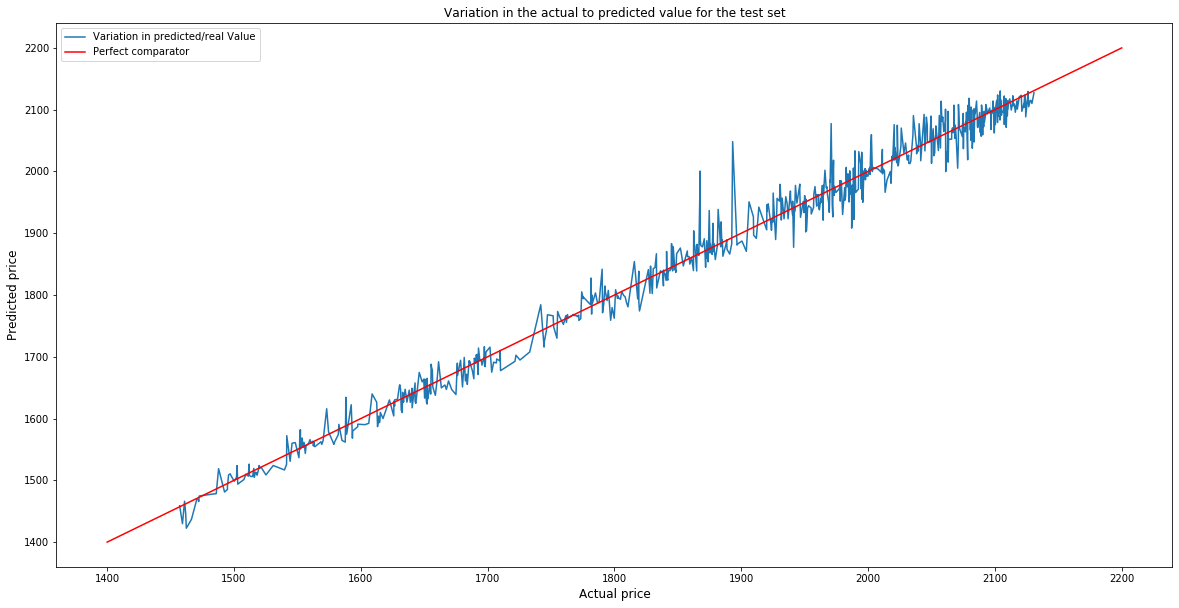

In [48]:
# plotting the variation in stock value by value
x = test['true']
y = test['predicted']
x2 = [1400,2200]
y2 = [1400, 2200]
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
ax = sns.lineplot(y=y, x=x, label="Variation in predicted/real Value")
ax2 = sns.lineplot(y=y2, x=x2, c='red', label='Perfect comparator')
    
ax.set_ylabel("Predicted price", size = 'large') 
ax.set_xlabel("Actual price", size='large')
ax.set_title('Variation in the actual to predicted value for the test set', size='large')

plt.show()  

## Selecting the k-best features again


In [49]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
# define the dataset
# Set the training set features and target
X = train[['5_day_average','30_day_average','365_day_average','std_365_days','365_day_average_vol','5_day_average_vol','std_5_days',
'std_365_days_vol','std_5_days_vol','lowest365_current_ratio','std_5_to_365_ratio','std_5_to_365__vol_ratio',
'5_to_365_ratio','5_to_365_vol_ratio','highest365_current_ratio']]
y = train['close']

# fit our data to the SelectKBest filter using the f_regression as the scoring technique

KBest_f_regression = SelectKBest(f_regression, k=10).fit(X, y)

#Get features with get_support()
# get_feature_names_out([feature_names_in_])
Best_f = KBest_f_regression.get_support(1) # the most important features using f_regression
X_new_f = X[X.columns[Best_f]] # final features from f_regression
print('Features selected using f_regression:','\n\n', sorted(X_new_f))


Features selected using f_regression: 

 ['30_day_average', '365_day_average', '365_day_average_vol', '5_day_average', '5_day_average_vol', 'lowest365_current_ratio', 'std_365_days', 'std_365_days_vol', 'std_5_days', 'std_5_days_vol']


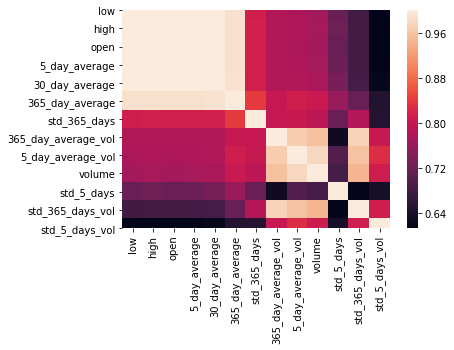

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select just those features with a correlation to SalePrice that is greater than 0.3 (arbitrary figure)
strong_corrs = sorted_corrs[(sorted_corrs>0.3) & (sorted_corrs !=1)]

# Filter the train_subset to only include these features and save as corrmat
corrmat = shares[strong_corrs.index]

# Now create a heatmap of the correlations between all columns in 'corrmat'
sns.heatmap(corrmat.corr())

## RFE SELECTION

In [51]:
# optimising the number of features selected using RFECV
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor

# define dataset

X = train[['5_day_average','30_day_average','365_day_average','std_365_days','365_day_average_vol','5_day_average_vol','std_5_days',
'std_365_days_vol','std_5_days_vol','lowest365_current_ratio','std_5_to_365_ratio','std_5_to_365__vol_ratio',
'5_to_365_ratio','5_to_365_vol_ratio','highest365_current_ratio']]
y = train['close']

# initiate RFECV and fit it to our data
rfecv = RFECV(estimator=DecisionTreeRegressor())
rfecv.fit(X,y)

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfecv, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Optimum number of features: %d" % rfecv.n_features_)

C:\Users\annsc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


MAE: -6.732 (0.716)
Optimum number of features: 3


In [52]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])
for i in range(X.shape[1]):
    row = {'feature': i, 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)

selected_features = df_features.sort_values('ranking')
selected_features['feature_name'] = X.columns[selected_features.index]
list_names = selected_features['feature_name'][selected_features.loc[:,'ranking']==1]
selected_features

,feature,support,ranking,feature_name
0,0,True,1,5_day_average
2,2,True,1,365_day_average
4,4,True,1,365_day_average_vol
1,1,False,2,30_day_average
14,14,False,3,highest365_current_ratio
6,6,False,4,std_5_days
9,9,False,5,lowest365_current_ratio
5,5,False,6,5_day_average_vol
10,10,False,7,std_5_to_365_ratio
11,11,False,8,std_5_to_365__vol_ratio


In [53]:
search_space = {
    'fit_intercept' : [True, False],
    'normalize' : [True, False]
}

grid = GridSearchCV(estimator = LinearRegression(),
                    param_grid = search_space,
                    scoring = ['r2', 'explained_variance'],
                   refit = 'r2',
                   cv = 5
                   )

X = train[['5_day_average','30_day_average','365_day_average','std_365_days','365_day_average_vol','5_day_average_vol','std_5_days',
'std_365_days_vol','std_5_days_vol','lowest365_current_ratio','std_5_to_365_ratio','std_5_to_365__vol_ratio',
'5_to_365_ratio','5_to_365_vol_ratio','highest365_current_ratio']]
y = train['close']

grid.fit(X,y)

grid.best_params_


{'fit_intercept': False, 'normalize': True}

In [54]:
print(grid.best_estimator_)
print(grid.best_score_)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)
0.9864470966278839


## Using the optimized settings for our Linear Regression Model

In [55]:
# use the linear regression model on the train set
lrm = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)
lrm.fit(train_features, train_target)

# make predictions using the current model
train['predicted'] = lrm.predict(train_features)
train['true'] = train_target

# finding the row error
train['error'] = train['predicted']-train['true']
train['abs_error'] = abs(train['error'])
print(train[['predicted', 'true', 'error', 'abs_error']])

model_score = lrm.score(train_features, train_target)
print('This model achieved a score of:', model_score)

# calculating the mean_absolute_error for the train set
train_mae = train['abs_error'].mean()
print('The Mean Absolute Error (mae) for the train set is:', train_mae, '\n\n',
'The results from the previous model with only 5 features were:','\n',
      'This model achieved a score of: 0.9995334690232623','\n',
'The Mean Absolute Error (mae) for the train set is: 5.416975464369143')

         predicted         true      error  abs_error
15859    26.386433    25.620001   0.766432   0.766432
15858    26.245917    25.760000   0.485917   0.485917
15857    26.231179    25.930000   0.301179   0.301179
15856    26.502178    25.980000   0.522178   0.522178
15855    26.712178    25.959999   0.752179   0.752179
...            ...          ...        ...        ...
743    1441.396317  1426.660034  14.736283  14.736283
742    1442.400840  1419.829956  22.570884  22.570884
741    1437.005489  1418.099976  18.905513  18.905513
740    1433.157103  1402.430054  30.727049  30.727049
739    1424.377859  1426.189941  -1.812082   1.812082

[15121 rows x 4 columns]
This model achieved a score of: 0.9995164617752764
The Mean Absolute Error (mae) for the train set is: 5.148238971597844 

 The results from the previous model with only 5 features were: 
 This model achieved a score of: 0.9995334690232623 
 The Mean Absolute Error (mae) for the train set is: 5.416975464369143


C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

## Using the optimized model on our test set

In [56]:
# Set the test set features and target
test_features = test[['5_day_average','30_day_average','365_day_average','std_365_days','365_day_average_vol','5_day_average_vol','std_5_days',
'std_365_days_vol','std_5_days_vol','lowest365_current_ratio','std_5_to_365_ratio','std_5_to_365__vol_ratio',
'5_to_365_ratio','5_to_365_vol_ratio','highest365_current_ratio']]
test_target = test['close']

# make predictions on the test set
test['predicted'] = lrm.predict(test_features)
test['true'] = test_target

# finding the row error
test['error'] = test['predicted']-test['true']
test['abs_error'] = abs(test['error'])
print(test[['predicted', 'true', 'error', 'abs_error']])

model_score = lrm.score(test_features, test_target)
print('This model achieved a score of:', model_score)

# calculating the mean_absolute_error for the train set
test_mae = np.mean(test['abs_error'])
print('The Mean Absolute Error (mae) for the test set is:', test_mae, '\n\n')
print('In comparison, the results previously, for the same features, was:', '\n',
      'This model achieved a score of: 0.9871984709552234', '\n',
      'The Mean Absolute Error (mae) for the test set is: 15.796085417632883')

       predicted         true      error  abs_error
738  1422.252322  1462.420044 -40.167722  40.167722
737  1428.078189  1459.369995 -31.291806  31.291806
736  1435.539151  1466.469971 -30.930820  30.930820
735  1445.247531  1461.890015 -16.642484  16.642484
734  1457.962459  1457.150024   0.812435   0.812435
..           ...          ...        ...        ...
4    2090.064850  2102.629883 -12.565033  12.565033
3    2093.030574  2079.510010  13.520564  13.520564
2    2090.776603  2049.620117  41.156486  41.156486
1    2081.414797  2091.689941 -10.275144  10.275144
0    2079.168310  2077.070068   2.098242   2.098242

[739 rows x 4 columns]
This model achieved a score of: 0.9866914310827405
The Mean Absolute Error (mae) for the test set is: 16.022035064158604 


In comparison, the results previously, for the same features, was: 
 This model achieved a score of: 0.9871984709552234 
 The Mean Absolute Error (mae) for the test set is: 15.796085417632883


C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

So whilst we might have imporved the results from our training set, we worsened (slightly) the results we oBtained from the test set.

In [57]:
print(grid.best_score_)

0.9864470966278839


In [71]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

X_train = train[['5_day_average','30_day_average','365_day_average','std_365_days','365_day_average_vol','5_day_average_vol','std_5_days',
'std_365_days_vol','std_5_days_vol','lowest365_current_ratio','std_5_to_365_ratio','std_5_to_365__vol_ratio',
'5_to_365_ratio','5_to_365_vol_ratio','highest365_current_ratio']]
y_train = train['close']

X_test = test[['5_day_average','30_day_average','365_day_average','std_365_days','365_day_average_vol','5_day_average_vol','std_5_days',
'std_365_days_vol','std_5_days_vol','lowest365_current_ratio','std_5_to_365_ratio','std_5_to_365__vol_ratio',
'5_to_365_ratio','5_to_365_vol_ratio','highest365_current_ratio']]
y_test = test['close']

# create an xgboost regression model
model = XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8, early_stopping_rounds = 5, verbose = 5)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )


Mean MAE: 4.264 (0.187)


With matpotlib library we can plot training results for each run (from XGBoost output). This helps to understand if iteration which was chosen to build the model was the best one possible. Here we are using sklearn library to evaluate model accuracy and then plotting training results with matpotlib:


In [77]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

X_train = train[['5_day_average','30_day_average','365_day_average','std_365_days','365_day_average_vol','5_day_average_vol','std_5_days',
'std_365_days_vol','std_5_days_vol','lowest365_current_ratio','std_5_to_365_ratio','std_5_to_365__vol_ratio',
'5_to_365_ratio','5_to_365_vol_ratio','highest365_current_ratio']]
y_train = train['close']

X_test = test[['5_day_average','30_day_average','365_day_average','std_365_days','365_day_average_vol','5_day_average_vol','std_5_days',
'std_365_days_vol','std_5_days_vol','lowest365_current_ratio','std_5_to_365_ratio','std_5_to_365__vol_ratio',
'5_to_365_ratio','5_to_365_vol_ratio','highest365_current_ratio']]
y_test = test['close']

# create an xgboost regression model
xgb_model = XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8, early_stopping_rounds = 5, verbose = 5)

# use the linear regression model on the train set
xgb_model.fit(X_train, y_train)

# make predictions using the current model
train['predicted'] = xgb_model.predict(X_train)
train['true'] = y_train

# finding the row error
train['error'] = train['predicted']-train['true']
train['abs_error'] = abs(train['error'])
print(train[['predicted', 'true', 'error', 'abs_error']])

model_score = xgb_model.score(X_train, y_train)
print('This model achieved a score of:', model_score)

# calculating the mean_absolute_error for the train set
train_mae = train['abs_error'].mean()
print('The Mean Absolute Error (mae) for the train set is:', train_mae, '\n\n',
'The results from the previous model with only 5 features were:','\n',
      'This model achieved a score of: 0.9995334690232623','\n',
'The Mean Absolute Error (mae) for the train set is: 5.416975464369143')

[14:14:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

         predicted         true      error  abs_error
15859    26.335545    25.620001   0.715544   0.715544
15858    26.335545    25.760000   0.575545   0.575545
15857    26.347719    25.930000   0.417719   0.417719
15856    26.335545    25.980000   0.355545   0.355545
15855    26.335545    25.959999   0.375546   0.375546
...            ...          ...        ...        ...
743    1427.768555  1426.660034   1.108521   1.108521
742    1426.239014  1419.829956   6.409058   6.409058
741    1422.043945  1418.099976   3.943969   3.943969
740    1419.473022  1402.430054  17.042968  17.042968
739    1420.409180  1426.189941  -5.780761   5.780761

[15121 rows x 4 columns]
This model achieved a score of: 0.9998746870907522
The Mean Absolute Error (mae) for the train set is: 2.8593803408636966 

 The results from the previous model with only 5 features were: 
 This model achieved a score of: 0.9995334690232623 
 The Mean Absolute Error (mae) for the train set is: 5.416975464369143


In [78]:
# make predictions using the current model
test['predicted'] = xgb_model.predict(X_test)
test['true'] = y_test

# finding the row error
test['error'] = test['predicted']-test['true']
test['abs_error'] = abs(test['error'])
print(test[['predicted', 'true', 'error', 'abs_error']])

model_score = xgb_model.score(X_test, y_test)
print('This model achieved a score of:', model_score)

# calculating the mean_absolute_error for the train set
test_mae = test['abs_error'].mean()
print('The Mean Absolute Error (mae) for the train set is:', test_mae, '\n\n',
'The results from the previous model with only 5 features were:','\n',
      'This model achieved a score of: 0.9995334690232623','\n',
'The Mean Absolute Error (mae) for the train set is: 5.416975464369143')

       predicted         true       error   abs_error
738  1418.095581  1462.420044  -44.324463   44.324463
737  1441.524170  1459.369995  -17.845825   17.845825
736  1444.830566  1466.469971  -21.639405   21.639405
735  1454.964844  1461.890015   -6.925171    6.925171
734  1456.628662  1457.150024   -0.521362    0.521362
..           ...          ...         ...         ...
4    1494.848267  2102.629883 -607.781616  607.781616
3    1497.395264  2079.510010 -582.114746  582.114746
2    1490.433105  2049.620117 -559.187012  559.187012
1    1483.767212  2091.689941 -607.922729  607.922729
0    1495.646240  2077.070068 -581.423828  581.423828

[739 rows x 4 columns]
This model achieved a score of: -3.479398329408113
The Mean Absolute Error (mae) for the train set is: 358.2729468861744 

 The results from the previous model with only 5 features were: 
 This model achieved a score of: 0.9995334690232623 
 The Mean Absolute Error (mae) for the train set is: 5.416975464369143


C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\annsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val